# **Loading the Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# Convert the Google Drive sharing link to a direct download link
file_id = '1o-54pQKhQSP73YXeUSm5P23D48YJM9Nf'
download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

# Use pandas to read the CSV file directly from the download URL
df = pd.read_csv(download_url)

In [ ]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# **Initial Data Exploration**

In [ ]:
# Display the structure of the dataset
print("\nData Types and Missing Values:")
df.info()

# Check for missing values in each column
print("\nMissing Values in Each Column:")
df.isnull().sum()


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), obje

id                     0
user_name              0
user_location       2270
user_description     680
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [ ]:
# Count the number of unique values in each column, handling unhashable types
print("\nNumber of Unique Values in Each Column:")
for column in df.columns:
    if df[column].dtype == 'object':
        try:
            unique_count = df[column].nunique()
        except TypeError:  # Catch unhashable types
            unique_count = 'Unhashable type'
    else:
        unique_count = df[column].nunique()
    print(f"{column}: {unique_count}")


Number of Unique Values in Each Column:
id: 11020
user_name: 7202
user_location: 3136
user_description: 6914
user_created: 7157
user_followers: 3674
user_friends: 2757
user_favourites: 6122
user_verified: 2
date: 11008
text: 11013
hashtags: 4657
source: 64
retweets: 78
favorites: 181
is_retweet: 1


In [ ]:
df = df.drop('is_retweet', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10340 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
dtypes: bool(1), int64(6), object(8)
memory usage: 1.2+ MB


**Observations:**

Missing values:
- user_location: 2,270 missing values
- user_description: 680 missing values
- hashtags: 2,582 missing values
- source: 1 missing value

Unique values:
- is_retweet only has 1 unique variable, not useful for analyze.

We decided to drop is_retweet variable and remain missing values.



# **Exploratory data analysis(EDA)**

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Initialize NLTK
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Compile regex patterns for efficiency
url_pattern = re.compile

# Text cleaning function
def clean(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.strip()
    return text

# Remove stopwords from the cleaned text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply cleaning and stopwords removal to the 'text' column
df['clean_text'] = df['text'].apply(clean).apply(remove_stopwords)

# Initialize the sentiment analyzer
sia = SIA()

# Define function to get sentiment labels
def get_sentiment(text):
    sentiment = sia.polarity_scores(text)['compound']
    if sentiment > 0.05:
        return 'Positive'
    elif sentiment < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the cleaned text
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Print first few rows of the updated DataFrame
print("First few rows of the updated dataset with sentiment labels:")
df.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of the updated dataset with sentiment labels:


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,clean_text,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,folks said daikon paste could treat cytokine s...,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,world wrong side history year hopefully bigges...,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,coronavirus SputnikV AstraZeneca PfizerBioNTec...,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,Facts immutable Senator even youre ethically s...,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,Explain need vaccine BorisJohnson MattHancock ...,Neutral


Counts of each sentiment category:
sentiment
Neutral     4684
Positive    4595
Negative    1741
Name: count, dtype: int64


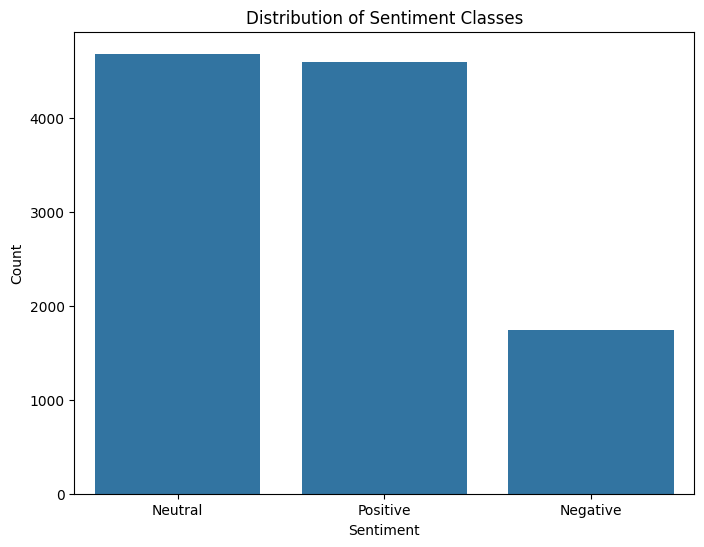

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Count the number of instances for each sentiment class and print them
sentiment_counts = df['sentiment'].value_counts()
print("Counts of each sentiment category:")
print(sentiment_counts)

# Plot the count of each sentiment class using Seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=sentiment_counts.index)
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


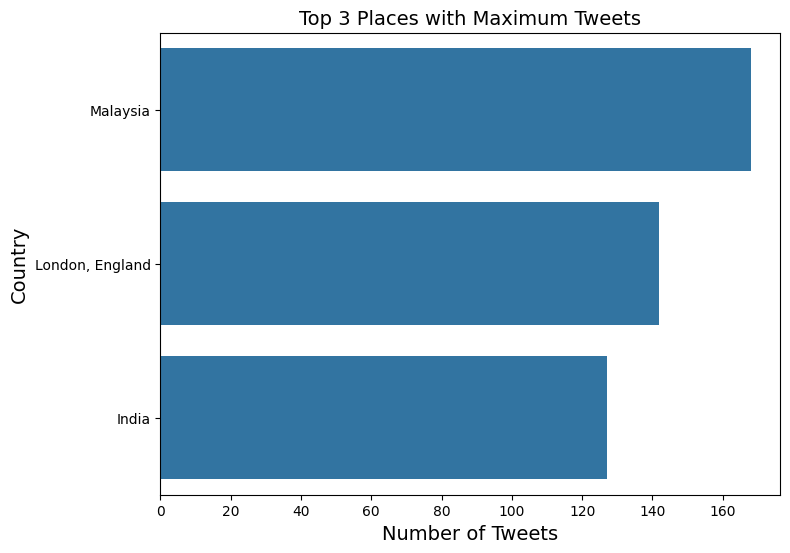

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df["user_location"].value_counts().values[:3],
            y=df["user_location"].value_counts().index[:3])
plt.title("Top 3 Places with Maximum Tweets", fontsize=14)
plt.xlabel("Number of Tweets", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.show()

By identifying the countries with the most heated tweets, Pfizer and BioNTech can analyze the underlying reasons for the heightened discussions surrounding their vaccine, tailor their marketing strategies accordingly, prioritize engagement efforts in those regions, and address any specific concerns or sentiments that may be prevalent.

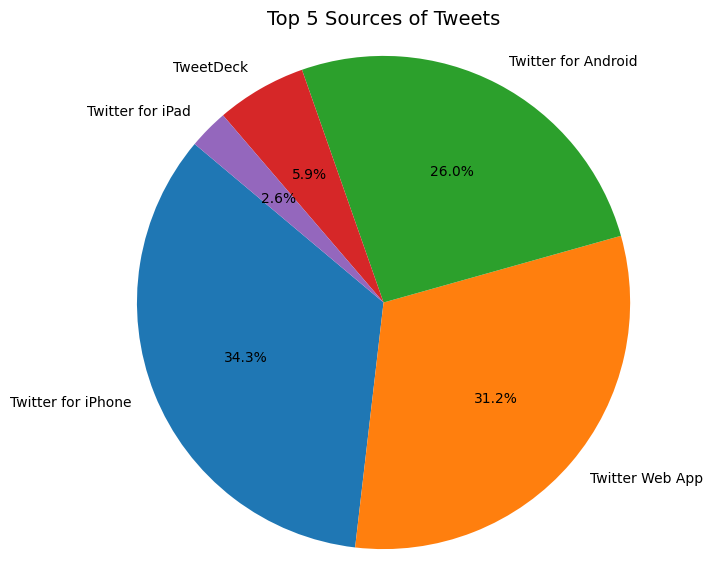

In [ ]:
# Calculate the percentage of tweets from each source
source_counts = df["source"].value_counts()[:5]
total_tweets = df["source"].count()
percentages = (source_counts / total_tweets) * 100

# Plot the pie chart
plt.figure(figsize=(7, 7))
plt.pie(percentages, labels=source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Sources of Tweets", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**30 Most Common Hashtags**

In [ ]:
import plotly.express as px

# Ensure 'hashtags' column is filled with '[]' for missing values
df['hashtags'] = df['hashtags'].fillna('[]')

# Extract all hashtags from the 'hashtags' column
all_hashtags = []
for tags in df['hashtags']:
    tags_list = tags.strip('][').split(', ')
    for tag in tags_list:
        all_hashtags.append(tag)

# Replace empty strings with 'No Hashtag'
all_hashtags = ['No Hashtag' if tag == '' else tag for tag in all_hashtags]

# Convert to pandas Series
all_hashtags_series = pd.Series(all_hashtags)

# Count instances of tweets with no hashtags
no_hashtag_count = (all_hashtags_series == 'No Hashtag').sum()
print('There are {} instances of tweets in which No Hashtags were used'.format(no_hashtag_count))

# Count and visualize the 30 most common hashtags
if 'No Hashtag' in all_hashtags_series.index:
    common_hashtags = all_hashtags_series.value_counts().drop(index='No Hashtag').head(30).reset_index()
else:
    common_hashtags = all_hashtags_series.value_counts().head(30).reset_index()
common_hashtags.columns = ['Common Hashtags', 'count']
fig = px.treemap(common_hashtags, path=['Common Hashtags'], values='count', title='30 Most Common Hashtags')
fig.show()


There are 2582 instances of tweets in which No Hashtags were used


**Observations:**

The majority of hashtags used in tweets were related to the Pfizer-BioNTech vaccine, with only a small number of tweets discussing vaccines from other companies such as Moderna and AstraZeneca.

In the future, consider using these hashtags in the company's own posts to reach broader audience.






**Define Positive, Negative, Neutral Tweets**

In [ ]:
Positive_tweets = df[df['sentiment'] == 'Positive']['clean_text']
Negative_tweets = df[df['sentiment'] == 'Negative']['clean_text']
Neutral_tweets = df[df['sentiment'] == 'Neutral']['clean_text']

**70 Most Common Words in Positive Tweets**

In [ ]:
all_positive_words = []

for tweet in Positive_tweets:
    words = tweet.split()  # Split the text into words
    all_positive_words.extend(words)  # Extend the list with words from each tweet

# Convert to pandas Series
all_positive_words = pd.Series(all_positive_words)

# Check if the label '' exists in the index before dropping it
if '' in all_positive_words.index:
    all_positive_words = all_positive_words.drop(labels=[''])

# Count occurrences of each word and select the top 70 most common words
common_words = all_positive_words.value_counts().iloc[:70].rename_axis('Common Positive Words').reset_index(name='count')

# Create a treemap visualization using Plotly Express
fig = px.treemap(common_words, path=['Common Positive Words'], values='count', title='70 Most Common Words In Positive Tweets')
fig.show()

**70 Most Common Words in Negative Tweets**

In [ ]:
all_negative_words = []

for tweet in Negative_tweets:
    words = tweet.split()  # Split the text into words
    all_negative_words.extend(words)  # Extend the list with words from each tweet

# Convert to pandas Series
all_negative_words = pd.Series(all_negative_words)

# Check if the label '' exists in the index before dropping it
if '' in all_negative_words.index:
    all_negative_words = all_negative_words.drop(labels=[''])

# Count occurrences of each word and select the top 70 most common words
common_words_negative = all_negative_words.value_counts().iloc[:70].rename_axis('Common Negative Words').reset_index(name='count')

# Create a treemap visualization using Plotly Express
fig = px.treemap(common_words_negative, path=['Common Negative Words'], values='count', title='70 Most Common Words In Negative Tweets')
fig.show()

In [ ]:
# Filter the DataFrame to include only tweets containing the word "died"
tweets_with_died = df[df['text'].str.contains('died', case=False)]

# Extract the user names of users who tweeted about "died"
users_with_died = tweets_with_died['user_name'].unique()

# Print the user names
print("Users who tweeted about 'died':")
print(users_with_died)

Users who tweeted about 'died':
['Financial Mirror' 'BNWtranslation/Dawn Gable CT, MPS' 'Tayyaba Ali, MD'
 'Salmakaveli' 'Business Recorder' 'Dilip Dhakal'
 'Canadian Advocacy Centre 4 Health Safety & Justice' 'Grizzle Guts 🐸'
 'Mark Woody' 'Becky With The Good Hair' 'Daily Facts Zone'
 'Loves Truth & Art #FreeSpeech' 'Ananova' 'Ian 3.5% #FBPE' 'Rose Webster'
 'The Epoch Times' 'KalhanRan' 'CCTV+' 'The Insider🦉' 'DT Next' '🇹🇷DFE🇹🇷'
 'Marta' 'Marc B.' 'KneelB4Zod!™' 'Ktulhu' 'Raj Kumar Rai' 'YaSiR'
 'ਪੀਟੀਸੀ ਨਿਊਜ਼ | PTC News' 'The New Indian Express' 'TheNews21'
 'the great awakening for humanity' 'Sam Murden' '105.3 Afro FM'
 'VictorMeldrew' 'Om ॐ' 'Dr S Himesh#BoycottChineseProducts' 'Vanshaj'
 'Peter van Brandwijk' 'Ritesh thakur' 'Harsh  Gupta'
 'David Gorski, MD, PhD' 'theciosaz #CSM #StuPD #TommyZee'
 'ッ MEDIOLANA® EDU' 'Marie Cachet' 'Truth & Justice' 'Claude'
 'Sue Thomas 💙' 'kristingreenwood' 'Frankie'
 'EnviroFra🌹✊ #BLM❤️ #Socialist #JoinAUnion ASAP' 'Williamsnews24'
 'Freeman' 

Directly contact these accounts that tweet negatively to address the problems and manage media crises.

**Top 10 Accounts with Highest Followers**

<ipython-input-190-e4c5330b3385>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-190-e4c5330b3385>:3: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-190-e4c5330b3385>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-190-e4c5330b3385>:8: UserWarning:


The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.

<ipython-input-190-e4c5330b3385>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipy

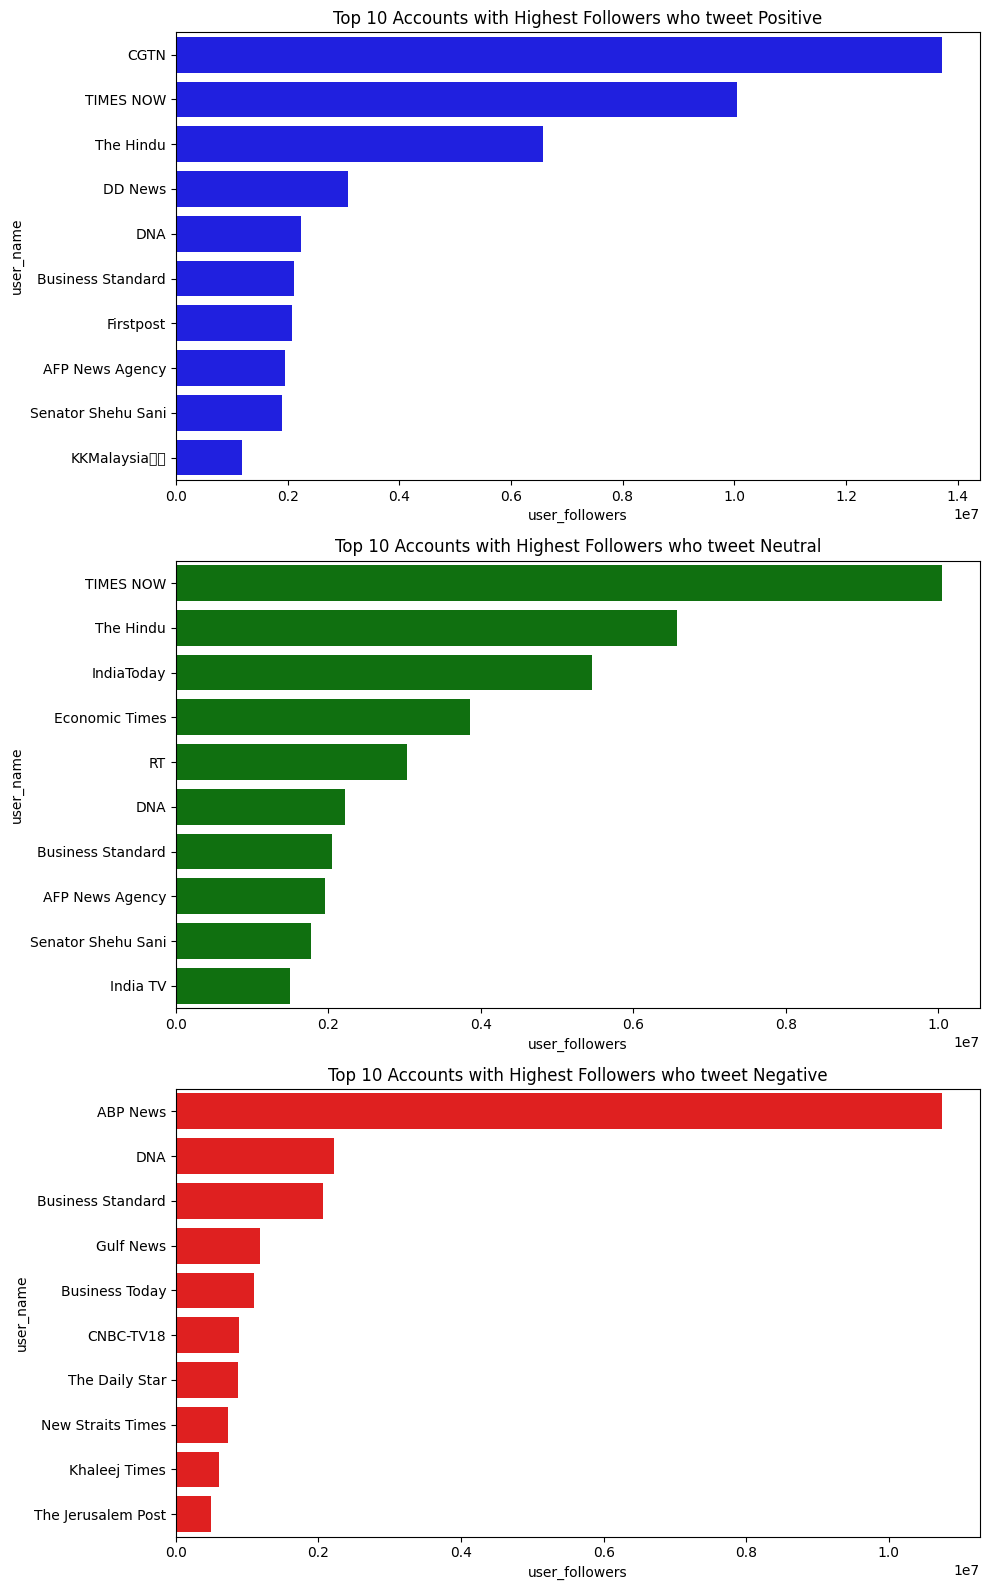

In [ ]:
from matplotlib import rcParams
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 16))
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax1, palette=["b"],
            data=df[df.sentiment == "Positive"]
            .drop_duplicates(subset=["user_name"])
            .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax1.set_title('Top 10 Accounts with Highest Followers who tweet Positive')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax2, palette=["g"],
            data=df[df.sentiment == "Neutral"]
            .drop_duplicates(subset=["user_name"])
            .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax2.set_title('Top 10 Accounts with Highest Followers who tweet Neutral')
sns.barplot(x="user_followers", y="user_name", orient="h", ax=ax3, palette=["r"],
            data=df[df.sentiment == "Negative"]
            .drop_duplicates(subset=["user_name"])
            .sort_values(by=["user_followers"], ascending=False)[["user_name", "user_followers"]][:10])
ax3.set_title('Top 10 Accounts with Highest Followers who tweet Negative')

plt.tight_layout()
plt.show()

Promote influencers' positive tweets or collaborate with them to promote marketing content.

In [ ]:
# Function to find the user location of top accounts by sentiment
def get_top_accounts_locations(df, sentiment):
    top_accounts = df[df.sentiment == sentiment] \
        .drop_duplicates(subset=["user_name"]) \
        .sort_values(by=["user_followers"], ascending=False) \
        [["user_name", "user_location"]][:10]
    return top_accounts

# Find user locations for each sentiment category
positive_top_accounts = get_top_accounts_locations(df, "Positive")
neutral_top_accounts = get_top_accounts_locations(df, "Neutral")
negative_top_accounts = get_top_accounts_locations(df, "Negative")

# Print the information
print("Top 10 Accounts with Highest Followers who tweet Positive:")
print(positive_top_accounts)
print("\nTop 10 Accounts with Highest Followers who tweet Neutral:")
print(neutral_top_accounts)
print("\nTop 10 Accounts with Highest Followers who tweet Negative:")
print(negative_top_accounts)


Top 10 Accounts with Highest Followers who tweet Positive:
                user_name     user_location
1121                 CGTN    Beijing, China
8956            TIMES NOW             India
912             The Hindu    Chennai, India
293               DD News  New Delhi, India
8472                  DNA             India
8174    Business Standard             India
10336           Firstpost     Mumbai, India
109       AFP News Agency            France
7273   Senator Shehu Sani           Nigeria
5246         KKMalaysia🇲🇾         Putrajaya

Top 10 Accounts with Highest Followers who tweet Neutral:
               user_name   user_location
8993           TIMES NOW           India
1469           The Hindu  Chennai, India
1481          IndiaToday           India
6785      Economic Times             NaN
197                   RT             NaN
2030                 DNA           India
1485   Business Standard           India
227      AFP News Agency          France
793   Senator Shehu Sani     

# **Preliminary Sentiment Analysis**

In this analysis, we utilized two different classification machine learning models that excel in handling multiclass classification: Support Vector Machine and Naive Bayes.

Interpreting the classification report provides insights into the performance of each model in predicting the sentiment of tweets related to Pfizer and Biotech vaccines. This understanding is valuable for further geographical analysis and targeted account monitoring to gauge public perception. It also aids in identifying potential issues or concerns and devising targeted marketing strategies accordingly.

 SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.46      0.56       331
     Neutral       0.77      0.91      0.83       965
    Positive       0.85      0.80      0.82       908

    accuracy                           0.80      2204
   macro avg       0.78      0.72      0.74      2204
weighted avg       0.80      0.80      0.79      2204



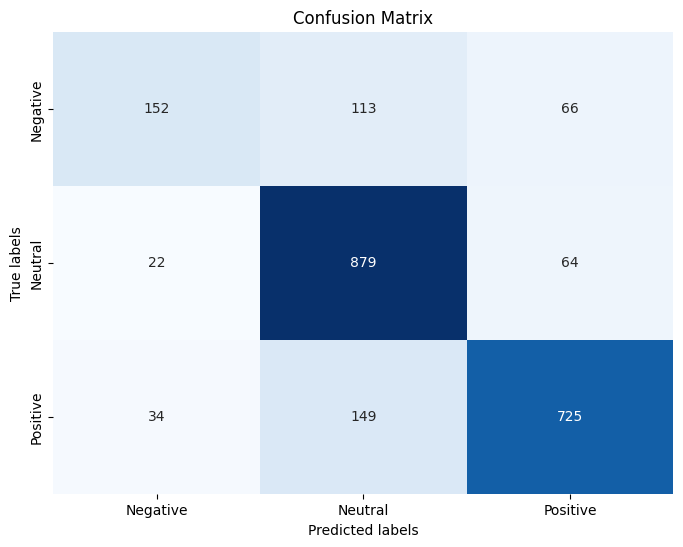

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = svm_classifier.predict(X_test_tfidf)

# Show classification report
print(" SVM Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize an SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, class_weight='balanced', random_state=42)

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create a voting classifier
voting_classifier = VotingClassifier(estimators=[('svm', svm_classifier), ('gb', gb_classifier)], voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred_voting = voting_classifier.predict(X_test_tfidf)

# Show classification report
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))


Voting Classifier Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.47      0.58       331
     Neutral       0.77      0.91      0.83       965
    Positive       0.85      0.81      0.83       908

    accuracy                           0.80      2204
   macro avg       0.79      0.73      0.75      2204
weighted avg       0.80      0.80      0.80      2204



**Observations:**
- The F1-score is a useful measure when the classes are imbalanced. the harmonic mean of precision and recall, providing a balance between the two metrics. Low performance on 'Negative' sentiments, with lower precision, recall, and F1-score.

Ensemble Methods: Ensemble methods combine multiple models to improve predictive performance. You can use a voting classifier that combines predictions from both SVM and Gradient Boosting models. Each model is trained independently, and their predictions are aggregated to make the final prediction.

A voting classifier (voting_classifier) is created using VotingClassifier from sklearn.ensemble. This classifier combines the predictions of the SVM and Gradient Boosting classifiers using soft voting.

- The precision, recall, and F1-scores are slightly improved compared to the standalone SVM classifier, especially for the 'Negative' class.
- The overall accuracy remained for 80%.

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.15      0.26       331
     Neutral       0.74      0.82      0.77       965
    Positive       0.71      0.85      0.77       908

    accuracy                           0.73      2204
   macro avg       0.78      0.60      0.60      2204
weighted avg       0.75      0.73      0.70      2204



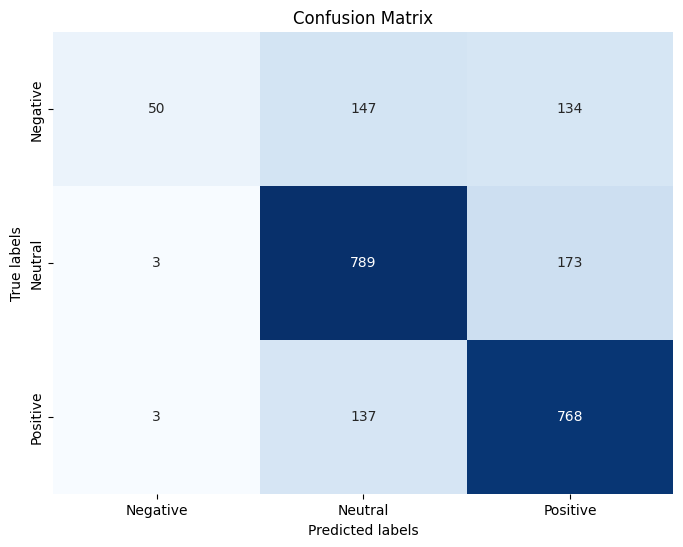

In [ ]:
from sklearn.naive_bayes import MultinomialNB
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize a Multinomial Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the Naive Bayes classifier
naive_bayes_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = naive_bayes_classifier.predict(X_test_tfidf)

# Show classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=naive_bayes_classifier.classes_, yticklabels=naive_bayes_classifier.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# Define a range of values for alpha to search over
param_grid = {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]}

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(naive_bayes_classifier, param_grid, cv=5, scoring='f1_macro')

# Fit GridSearchCV to the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict sentiment on the test set using the best model
y_pred = grid_search.predict(X_test_tfidf)

# Show classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'alpha': 0.1}

Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.47      0.55       331
     Neutral       0.80      0.78      0.79       965
    Positive       0.73      0.83      0.78       908

    accuracy                           0.75      2204
   macro avg       0.73      0.69      0.71      2204
weighted avg       0.75      0.75      0.75      2204



**Observations**
- The initial Multinomial Naive Bayes classifier had relatively low recall for the Negative class, indicating a significant number of false negatives. This was addressed through hyperparameter tuning with GridSearchCV, leading to improved recall and F1-score for the Negative class.

- While the performance for Neutral and Positive classes remained relatively stable, hyperparameter tuning helped optimize the model's overall performance with accuracy of 0.75, and a better F1-scores across all classes.

# **Applying Convolutional Neural Network**

After our initial analysis, we applied a Convolutional Neural Network (CNN) model designed to perform sentiment analysis on Twitter tweets. Unlike traditional models that use bag-of-words or TF-IDF for text representation, this CNN employs an embedding layer to transform text into dense vectors, capturing local dependencies effectively.








Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1000000   
                                                                 
 conv1d_1 (Conv1D)           (None, 46, 128)           64128     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 195       
                                                      

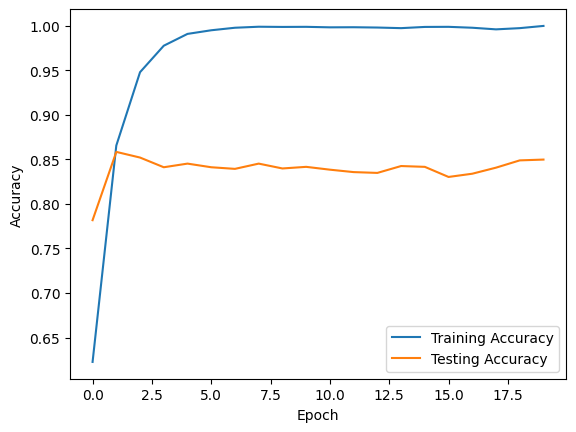

69/69 [==============================] - 0s 6ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.62      0.66       331
     neutral       0.86      0.89      0.88       965
    positive       0.88      0.89      0.88       908

    accuracy                           0.85      2204
   macro avg       0.82      0.80      0.81      2204
weighted avg       0.85      0.85      0.85      2204



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
import tensorflow as tf

# Prepare the data
X = df['text'].values
y = df['sentiment'].values  # Assuming sentiment has values 'positive', 'negative', 'neutral'

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenization and Padding
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_length = 50
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

# Map labels to integers
label_to_int = {'positive': 0, 'negative': 1, 'neutral': 2}
y_train_int = np.array([label_to_int[label.lower()] for label in y_train])
y_test_int = np.array([label_to_int[label.lower()] for label in y_test])

# CNN Model with Dropout
model = Sequential([
    Embedding(input_dim=10000, output_dim=100, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=64, activation='relu'),  # Added dense layer
    Dropout(0.5),  # Added dropout layer
    Dense(units=3, activation='softmax')  # Output layer with 3 units for 3 classes and softmax activation
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Create lists to store training and testing accuracy
train_acc_list = []
test_acc_list = []

# Define callback for tracking accuracy
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if 'accuracy' in logs:
            train_acc_list.append(logs['accuracy'])
        if 'val_accuracy' in logs:
            test_loss, test_accuracy = self.model.evaluate(X_test_padded, y_test_int)
            test_acc_list.append(test_accuracy)
            print("Training accuracy: {:.4f}".format(logs['accuracy']))
            print("Validation accuracy: {:.4f}".format(test_accuracy))


# Train the model
model.fit(
    X_train_padded,
    y_train_int,
    epochs=20,
    validation_data=(X_test_padded, y_test_int),
    callbacks=[AccuracyCallback()]
)

# Save the model
model.save('/content/drive/My Drive/Tweet_Sentiment')

# Plot training and validation accuracy
plt.plot(train_acc_list, label='Training Accuracy')
plt.plot(test_acc_list, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

from sklearn.metrics import classification_report

# Predict the classes for the test set
y_pred_probabilities = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)

# Get the class labels
int_to_label = {0: 'positive', 1: 'negative', 2: 'neutral'}
y_test_labels = np.array([int_to_label[int_val] for int_val in y_test_int])
y_pred_labels = np.array([int_to_label[int_val] for int_val in y_pred_classes])

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

**Observation:**

- Training Accuracy: The training accuracy consistently increases with each epoch and eventually reaches 1.0 (100%). This suggests that the model is capable of fitting the training data very well, achieving near-perfect accuracy.
- Validation Accuracy: The validation accuracy also increases initially, but it appears to plateau around 0.85 (85%) after a few epochs. This suggests that the model's performance on the validation data is stable and does not improve significantly after a certain point.
- We tried fine-tuning the Model Architecture by adding more layers, adjusting the number of units in each layer to improve precision and recall score. So we added a dense layer with 64 units after the global max-pooling layer and a dropout layer with a dropout rate of 0.5 to prevent overfitting.

Given these observations, the model seems to be performing well and not exhibiting signs of overfitting or underfitting. The gap between the training and validation accuracy is not substantial, indicating that the model generalizes well to unseen data.



# Prediction Phase

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model_path = '/content/drive/My Drive/Tweet_Sentiment'
model = load_model(model_path)

# Function to preprocess new tweets
def preprocess_tweets(tweets):
    # Tokenization
    sequences = tokenizer.texts_to_sequences(tweets)
    # Padding
    padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
    return padded_sequences

# Load new tweets data
new_tweets_file = 'Vaccination_Tweets_New.xlsx'
new_tweets_df = pd.read_excel(new_tweets_file)

# Extract tweets from the DataFrame
new_tweets = new_tweets_df['text'].tolist()

# Preprocess the new tweets
X_new = preprocess_tweets(new_tweets)

# Predict sentiment of new tweets
predictions = model.predict(X_new)

# Convert predictions to sentiment labels
int_to_label = {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiments = [int_to_label[np.argmax(pred)] for pred in predictions]

# Present the results
print("Predicted Sentiments for New Tweets:")
for tweet, sentiment in zip(new_tweets, sentiments):
    print(f"Tweet: {tweet.strip()}\nSentiment: {sentiment}\n")

1/1 [==============================] - 0s 75ms/step
Predicted Sentiments for New Tweets:
Tweet: Hold on America. We have 2 #vaccines to help us crush this virus. BUT we have to do our part. Make wise decisions
Sentiment: positive

Tweet: 1st dose done. #PfizerBioNTech
Sentiment: neutral

Tweet: COVID-19 vaccine #PfizerBioNTech. I now have more mRNA than I had this morning
Sentiment: neutral

Tweet: There is a massive elephant in the room today. Nothing mentioned about further supplies of #CoronavirusVaccine
Sentiment: positive

Tweet: A helpful side-by-side comparison of the #CovidVaccines. Looking forward to the 2nd dose of #PfizerBioNTech 💉 in ea…
Sentiment: positive

Tweet: #UPDATE A nurse in New York City on Monday became the first person in the United States to receive the coronavirus
Sentiment: positive

Tweet: #NEW: @methodistdallas has received its first shipment of #PfizerBioNTech's #COVID19 vaccine. Front line healthcare…
Sentiment: neutral

Tweet: It’s kind of surreal that t

**Observations:**

Using the saved CNN model with an accuracy of 85%, we conducted tests on 8 different tweets to evaluate its sentiment identification capability. As a result, the model correctly identified the sentiment of 7 out of 8 tweets.
